# Contents

* [Plotting](#plotting)
* [OOP version](#oop)
* [PSO algorithm](#pso)

## Plotting <a id="plotting"></a>

The only thing required for this animation to work is to install something called _ffmpeg_ for your Python installation. You do this with the following line:

##### Import relevant libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

##### Display the objective function plot in the background

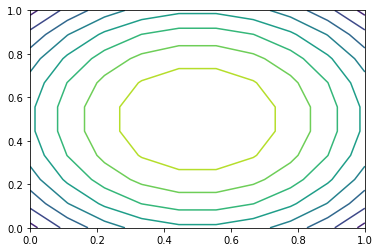

In [2]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, 1))
ax.set_ylim((0, 1))

line, = ax.plot([], [], marker="*", color="r", linestyle="None");

#add a background
x = np.linspace(0,1,10)
y = np.linspace(0,1,10)
z = np.zeros([10,10])
for i in range(x.shape[0]):
    for j in range(y.shape[0]):
        z[i,j] = (x[i] - 0.5)**2 + (y[j] - 0.5)**2

x1,x2 = np.meshgrid(x,y);
background = ax.contour(x1, x2, -z, 8); #, cmap="gray")

##### Define the animation function

In [3]:
x_init = np.random.rand(50)
y_init = np.random.rand(50)

# animation function. This is called sequentially
def animate(i):
    np.random.seed(0)
    x = x_init + np.random.rand(x_init.shape[0])*0.05*np.sin(i/5)
    y = y_init + np.random.rand(x_init.shape[0])*0.05*np.cos(i/5)
    line.set_data(x, y)
    return (line,)

##### Initialise then instantiate the animation

In [4]:
# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)

##### Tracer le graphique

In [5]:
HTML(anim.to_html5_video())

$$$$
$$$$
$$$$
$$$$
$$$$
$$$$
$$$$
$$$$
$$$$
$$$$
$$$$
$$$$
$$$$
$$$$
$$$$
$$$$
$$$$
$$$$
$$$$
$$$$

## PSO algorithm (OOP version) <a id="oop"></a>

Will leave this here to work on at a future date

In [6]:
class Swarm():
    
    global_best
    
    def __init__(self,n_particles,n_dims):
        self.positions = np.random.rand(n_parts,n_dims)
        self.part_best = self.positions
        self.glob_best = self.current_best()
        
    def Objective(self, m_positions):
        centre = 0.5*np.ones(m_positions.shape)
        return np.sum((m_positions - centre)**2, axis=1)
        
    def current_best(self):
        vals = self.Objective(self.positions)
        return np.min(vals)   

NameError: name 'global_best' is not defined

$$$$
$$$$
$$$$
$$$$
$$$$
$$$$
$$$$
$$$$
$$$$
$$$$
$$$$
$$$$
$$$$
$$$$
$$$$
$$$$

# PSO algorithm and visualization <a id="pso"></a>

### Define the objective function

In [7]:
def f(positions):
    if positions.ndim == 1:
        positions = positions.reshape(1,positions.shape[0])
    elif positions.ndim > 2:
        raise ValueError("The input matrix has more than two dimensions")
    centres = 0.5*np.ones(positions.shape)
    return np.sum((positions-centres)**2,axis=1)

### Set up the plot you are going to animate on

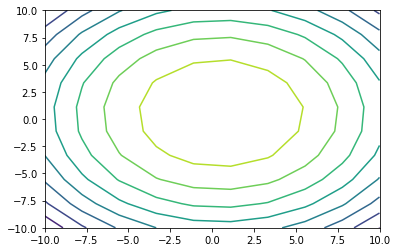

In [24]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim((-10,10))
ax.set_ylim((-10,10))

line, = ax.plot([], [], marker="*", color="r", linestyle="None");

#add a background
x = np.linspace(-10,10,10)
y = np.linspace(-10,10,10)
z = np.zeros([10,10])
for i in range(x.shape[0]):
    for j in range(y.shape[0]):
        z[i,j] = (x[i] - 0.5)**2 + (y[j] - 0.5)**2

x1,x2 = np.meshgrid(x,y);
background = ax.contour(x1, x2, -z, 8); #, cmap="gray")

### Define the parameters of the swarm

In [25]:
#define swarm
n_particles = 20
n_dims = 2

#define parameters
x_min = -5
x_max = 5
v_min = 0
v_max = 0.1
c_1 = 2
c_2 = 2

# Set the initial conditions
current_pos = x_min + (x_max-x_min)*np.random.rand(n_particles, n_dims) #initialise the particles
p_best = current_pos                                                    #set the particle best
g_best = p_best[np.argmin(f(current_pos)),:];                           #get the best location

v = v_min + (v_max-v_min)*np.random.rand(n_particles, n_dims)

is_better = np.zeros([n_particles,1])

## Define the animation function (swarm optimization)

In [26]:
# animation function. This is called sequentially
def animate(i):
    global v, current_pos, p_best, g_best, is_better #use the globally-defined variables of these things
    
    #update the positions using the velocity
    v += c_1*(np.random.rand(current_pos.shape[0],1))*(p_best-current_pos)
    v += c_2*(np.random.rand(current_pos.shape[0],1))*(g_best-current_pos)
#     v_norm = np.linalg.norm(v,axis=1).reshape([v.shape[0],1])             #code for velocity limitation
#     v = np.where(v_norm < v_max, v, v_max*v/v_norm)                       #(comment in to use it)
    current_pos += v
    
    #replace the p_bests with the current location if they're better
    is_better[:,0] = f(current_pos)<f(p_best)
    p_best = is_better*current_pos + np.logical_not(is_better)*p_best
    
    #update g_best
    if np.min(f(p_best)) < f(g_best):
        g_best = p_best[np.argmin(f(p_best)),:]
        
    #plot the result        
    line.set_data(current_pos[:,0], current_pos[:,1])
    return(line,)

## Run the animation

In [27]:
# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=400, interval=20, blit=True)

HTML(anim.to_html5_video())

In [19]:
g_best

array([0.49825659, 0.5014366 ])